In [1]:
import pandas as pd

# Load the CSV file
file_path = 'J:/Headlines/ciencia de datos/Data Analist/Data Visualization with Python/WEEK 5/task 1/australia_firewild.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head()

,Unnamed: 0,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
0,0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,2005,1
1,1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,2005,1
2,2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,2005,1
3,3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,2005,1
4,4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,2005,1


TASK 1.1: Understand the change in average estimated fire area over time using pandas to plot the line chart.

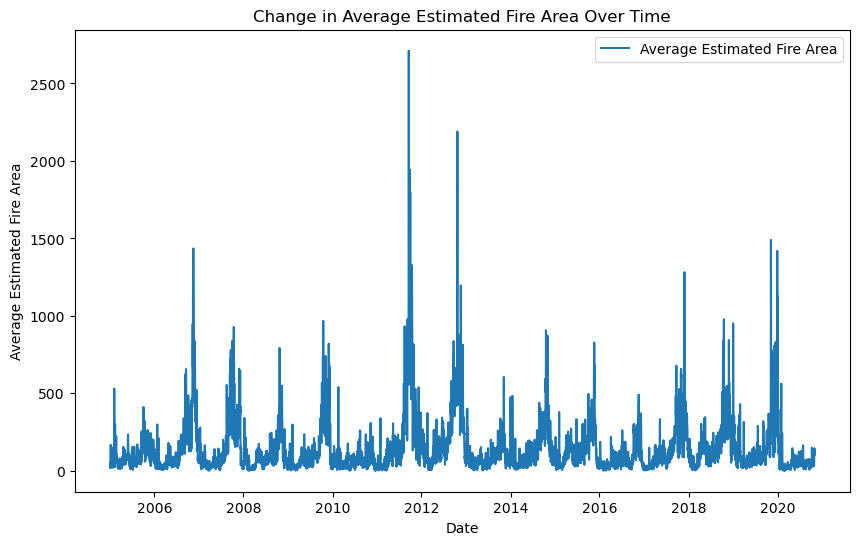

In [2]:
import matplotlib.pyplot as plt

# Convert date column to datetime format (assuming there's a 'Date' column)
df['Date'] = pd.to_datetime(df['Date'])

# Group by date and calculate the mean estimated fire area
average_fire_area = df.groupby('Date')['Estimated_fire_area'].mean()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(average_fire_area, label='Average Estimated Fire Area')
plt.xlabel('Date')
plt.ylabel('Average Estimated Fire Area')
plt.title('Change in Average Estimated Fire Area Over Time')
plt.legend()
plt.show()

TASK 1.2: Plot the estimated fire area over the month.

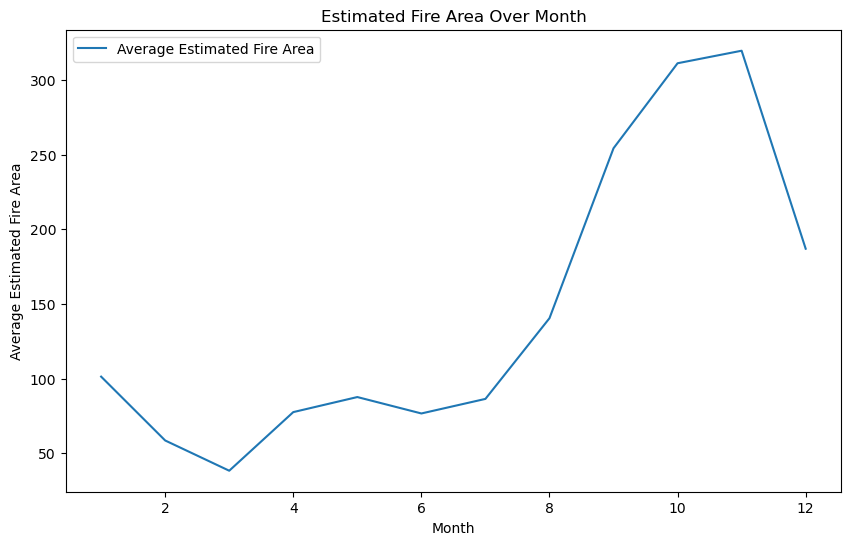

In [3]:
# Extract month from the date column
df['Month'] = df['Date'].dt.month

# Group by month and calculate the mean estimated fire area
average_fire_area_month = df.groupby('Month')['Estimated_fire_area'].mean()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(average_fire_area_month, label='Average Estimated Fire Area')
plt.xlabel('Month')
plt.ylabel('Average Estimated Fire Area')
plt.title('Estimated Fire Area Over Month')
plt.legend()
plt.show()

TASK 1.3: Use seaborn to develop a barplot of the mean estimated fire brightness across the regions.

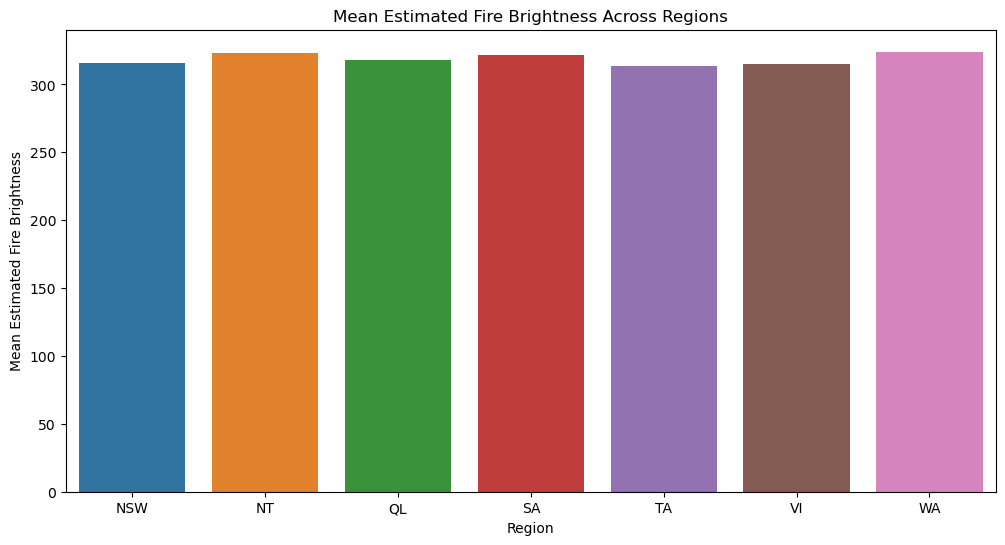

In [4]:
import seaborn as sns

# Group by region and calculate the mean estimated fire brightness
mean_fire_brightness = df.groupby('Region')['Mean_estimated_fire_brightness'].mean().reset_index()

# Plot the barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Mean_estimated_fire_brightness', data=mean_fire_brightness)
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness')
plt.title('Mean Estimated Fire Brightness Across Regions')
plt.show()

TASK 1.4: Develop a pie chart of the count of pixels for presumed vegetation fires across regions.

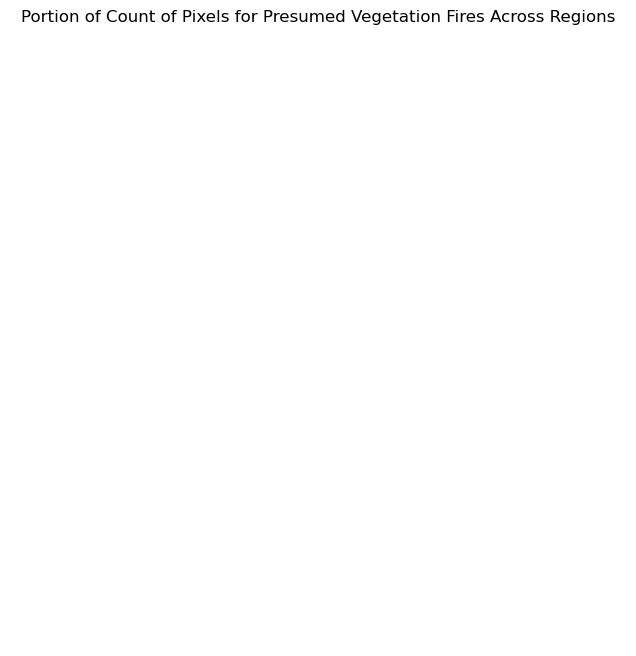

In [6]:
# Count the number of pixels for presumed vegetation fires by region
pixel_counts = df[df['Count'] == 'Mean_estimated_fire_radiative_power']['Region'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(pixel_counts, labels=pixel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Portion of Count of Pixels for Presumed Vegetation Fires Across Regions')
plt.show()

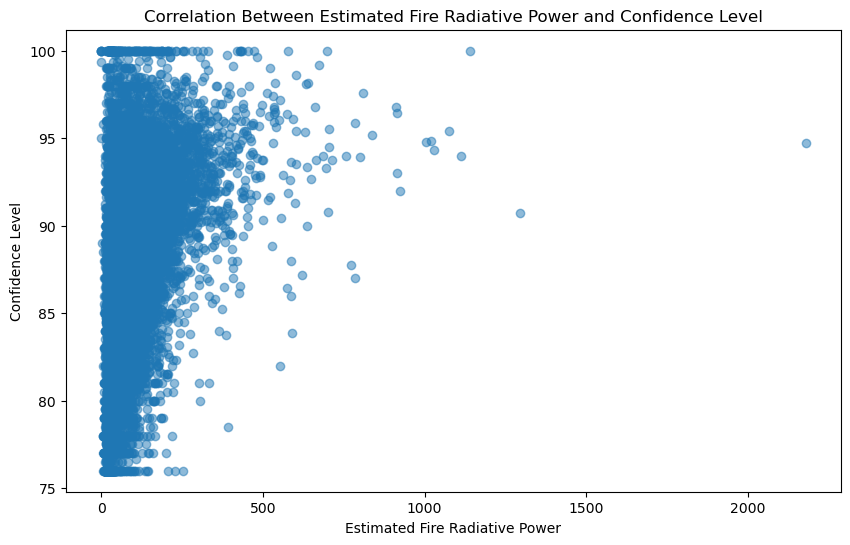

In [7]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Mean_estimated_fire_radiative_power'], df['Mean_confidence'], alpha=0.5)
plt.xlabel('Estimated Fire Radiative Power')
plt.ylabel('Confidence Level')
plt.title('Correlation Between Estimated Fire Radiative Power and Confidence Level')
plt.show()

In [ ]:
import folium

# Extract the data from the dataframe
regions = df['Region']  # Adjust column name as per actual CSV
latitudes = df['Latitude']  # Adjust column name as per actual CSV
longitudes = df['Longitude']  # Adjust column name as per actual CSV

# Create a map centered on Australia
map_center = [-25.2744, 133.7751]  # Coordinates for the center of Australia
m = folium.Map(location=map_center, zoom_start=4)

# Add markers for each region affected by wildfires
for region, lat, lon in zip(regions, latitudes, longitudes):
    folium.Marker(location=[lat, lon], popup=region).add_to(m)

# Save the map to an HTML file
output_path = '/mnt/data/australia_wildfires_map.html'
m.save(output_path)

output_path

In [17]:
import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Load the CSV file
file_path = 'J:/Headlines/ciencia de datos/Data Analist/Data Visualization with Python/WEEK 5/task 1/australia_firewild.csv'
df = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format if not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month_name()

# Filter for required columns only
df = df[['Region', 'Year', 'Month', 'Estimated_fire_area', 'Count']]

# Launch the app
app = dash.Dash(__name__)

In [18]:
app.layout = html.Div([
    html.H1("Fire Data Dashboard"),  # TASK 2.1

    html.Div([
        dcc.RadioItems(
            id='region-radio',
            options=[{'label': region, 'value': region} for region in df['Region'].unique()],
            value=df['Region'].unique()[0]
        ),
        dcc.Dropdown(
            id='year-dropdown',
            options=[{'label': year, 'value': year} for year in df['Year'].unique()],
            value=df['Year'].min()
        ),
    ]),  # TASK 2.2

    html.Div([
        html.Div(id='pie-chart-div', style={'width': '48%', 'display': 'inline-block'}),
        html.Div(id='bar-chart-div', style={'width': '48%', 'display': 'inline-block'}),
    ]),  # TASK 2.3
])

In [19]:
@app.callback(
    [Output('pie-chart-div', 'children'), Output('bar-chart-div', 'children')],
    [Input('region-radio', 'value'), Input('year-dropdown', 'value')]
)  # TASK 2.4
def update_charts(selected_region, selected_year):
    filtered_df = df[(df['Region'] == selected_region) & (df['Year'] == selected_year)]

    # Pie Chart for Monthly Average Estimated Fire Area
    avg_fire_area = filtered_df.groupby('Month')['Estimated_fire_area'].mean().reset_index()
    pie_fig = px.pie(avg_fire_area, values='Estimated_fire_area', names='Month', 
                     title='Monthly Average Estimated Fire Area')

    # Bar Chart for Monthly Average Count of Pixels for Presumed Vegetation Fires
    avg_pixel_count = filtered_df.groupby('Month')['Count'].mean().reset_index()
    bar_fig = px.bar(avg_pixel_count, x='Month', y='Count', 
                     title='Monthly Average Count of Pixels for Vegetation Fires')

    return [dcc.Graph(figure=pie_fig), dcc.Graph(figure=bar_fig)]  # TASK 2.5

if __name__ == '__main__':
    app.run_server(debug=True)